In [10]:
## Numpy array operations
import xarray as xr
import numpy as np
fname='2000monthly-meant.nc'
ds = xr.open_dataset(fname)
t=ds.t
t2=t**2
tlog=np.log(t)
tmax=np.amax(t, axis =1)

In [11]:
print(t)

<xarray.DataArray 't' (time: 12, level: 9, latitude: 73, longitude: 144)>
array([[[[249.78636, ..., 249.78636],
         ...,
         [287.83853, ..., 287.83853]],

        ...,

        [[246.77156, ..., 246.77156],
         ...,
         [267.35666, ..., 267.35666]]],


       ...,


       [[[240.8856 , ..., 240.8856 ],
         ...,
         [285.69244, ..., 285.69244]],

        ...,

        [[249.06802, ..., 249.06802],
         ...,
         [270.1178 , ..., 270.1178 ]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 1 10 100 200 300 500 700 850 1000
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [12]:
print(tmax)

<xarray.DataArray 't' (time: 12, latitude: 73, longitude: 144)>
array([[[250.05125, 250.05125, 250.05125, ..., 250.05125, 250.05125,
         250.05125],
        [251.27245, 251.33305, 251.39142, ..., 251.07939, 251.14449,
         251.2096 ],
        [252.1367 , 252.28935, 252.43303, ..., 251.64958, 251.81345,
         251.97733],
        ...,
        [288.2336 , 288.2381 , 288.24036, ..., 288.23135, 288.23135,
         288.2336 ],
        [287.91934, 287.92157, 287.92383, ..., 287.9126 , 287.91486,
         287.91708],
        [287.83853, 287.83853, 287.83853, ..., 287.83853, 287.83853,
         287.83853]],

       [[253.09975, 253.09975, 253.09975, ..., 253.09975, 253.09975,
         253.09975],
        [254.51173, 254.55664, 254.60378, ..., 254.37032, 254.41745,
         254.4646 ],
        [255.2413 , 255.25702, 255.27274, ..., 255.21661, 255.2211 ,
         255.23009],
...
        [276.8613 , 276.8725 , 276.88824, ..., 276.84332, 276.84558,
         276.8523 ],
        [276.2978

In [13]:
t.sum()
t.mean(dim="time")
t.min(dim="longitude")
t.argmin(dim="longitude") 
t.max(dim=["level","time"])

<xarray.DataArray 't' (latitude: 73, longitude: 144)>
array([[294.25873, 294.25873, 294.25873, ..., 294.25873, 294.25873,
        294.25873],
       [294.90076, 294.91873, 294.9322 , ..., 294.84015, 294.86035,
        294.88055],
       [295.08035, 295.15668, 295.233  , ..., 294.89404, 294.95688,
        295.01974],
       ...,
       [288.2336 , 288.2381 , 288.24036, ..., 288.23135, 288.23135,
        288.2336 ],
       [287.91934, 287.92157, 287.92383, ..., 287.9126 , 287.91486,
        287.91708],
       [287.83853, 287.83853, 287.83853, ..., 287.83853, 287.83853,
        287.83853]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0

NameError: name 'plt' is not defined

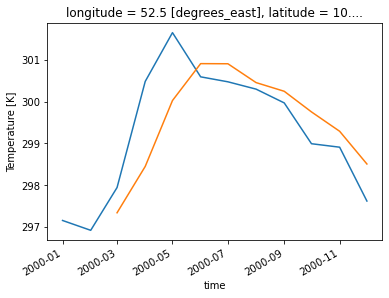

In [15]:
## Rolling average
tham=ds.t.sel(longitude=53.55, latitude=10, level=1000, method="nearest")
tr=tham.rolling(time=3)
#specifies rolling window of width 3 for time dimension
thamr=tr.mean()          # computes rolling average
tham.plot(label="Monthly mean T in Hamburg")
thamr.plot(label="Smoothed by rolling average")
plt.legend()

In [ ]:
##Block averaging